In [76]:
%matplotlib inline

In [77]:
# Falling through the earth

dia = 12742000 # diameter of the earth in meters
rad = dia/2.0
me = 5.972e24  # mass of the earth
pi = 3.1415926
G = 6.67384e-11 # gravitational constant
g = 9.8

volume = 4 * pi * pow(rad, 3.0) / 3.0
density = me / volume

def acc_at_depth(d):
    if d > rad:
        return g
    if d < -rad:
        return -g
    vol_d = 4 * pi * pow(d, 3.0) / 3.0
    md = density * vol_d
    acc = G*md / pow(d, 2.0)
    return acc

Lets plot the acceleration due to gravity vs distance from center of the earth. From our analytical work ($a_h = \frac {h}{R} g$), its expected to be a linear relationship.

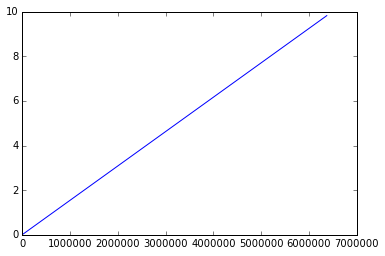

In [78]:
import matplotlib.pyplot as plt

acc_depth = []
for d in xrange(500, 1, -1):
    dd = d*rad / 500
    acc_depth.append((dd, acc_at_depth(dd)))

xvals = [a for a,b in acc_depth]
yvals = [b for a,b in acc_depth]
plt.plot(xvals, yvals)


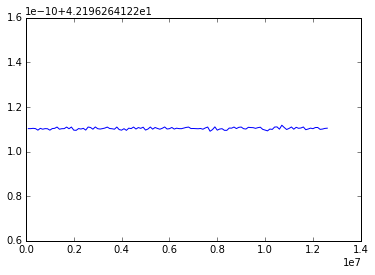

In [95]:
import math
from pprint import pprint as pp
chord_lengths = [100000*n for n in range(1, 127)]
g = 9.8

def get_acc(chlen, R, x):
    return (g/(2*R))*(chlen - 2*x)

def get_vt(s, v, a):
    rv = rt = 0
    if a == 0:
        rv = v
        rt = s/v
        return (rv, rt)
    rt = (math.sqrt(v*v + 2*a*s) - v) / a
    rv = v + a*rt
    return (rv, rt)
        
def get_travel_time(chlen, nparts, acc_func):
    dist = chlen/2.0
    curve_power = 2.0
    stfacs = [pow((float(x)/nparts), curve_power) for x in xrange(nparts+1)]
    steps = [dist*xx for xx in stfacs]
    total_time = 0
    cv = 0
    for st1, st2 in zip(steps, steps[1:]):
        dist = st2 - st1
        acc = acc_func(chlen, rad, st1)
        cv, time_part = get_vt(dist, cv, acc)
        total_time += time_part
        
    return 2*total_time

results = [(dist1, get_travel_time(dist1, 500, get_acc)) for dist1 in chord_lengths]

# plot of time vs chord length
xvals = [d for d, t in results]
yvals = [t/60.0 for d, t in results]
plt.plot(xvals, yvals)



The above plot shows that the travel time across chords of different length are almost exactly the same. The small wiggles in the curve are differences of less than $10^{-8}$%.

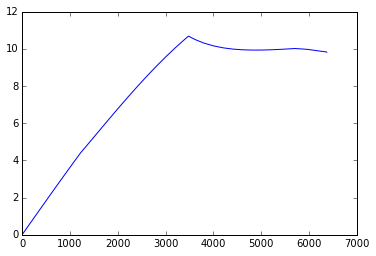

In [98]:
g_at_depth = """0.0	11266.20	3667.80	13088.48	1425.3	176.1	0.4407	363.850	0.0000
200.0	11255.93	3663.42	13079.77	1423.1	175.5	0.4408	362.900	0.7311
400.0	11237.12	3650.27	13053.64	1416.4	173.9	0.4410	360.030	1.4604
600.0	11205.76	3628.35	13010.09	1405.3	171.3	0.4414	355.280	2.1862
800.0	11161.86	3597.67	12949.12	1389.8	167.6	0.4420	348.670	2.9068
1000.0	11105.42	3558.23	12870.73	1370.1	163.0	0.4428	340.240	3.6203
1200.0	11036.43	3510.02	12774.93	1346.2	157.4	0.4437	330.050	4.3251
1221.5	11028.27	3504.32	12763.60	1343.4	156.7	0.4438	328.850	4.4002
1400.0	10249.59	0.00	12069.24	1267.9	0.0	0.5000	318.750	4.9413
1600.0	10122.91	0.00	11946.82	1224.2	0.0	0.5000	306.150	5.5548
1800.0	9985.54	0.00	11809.00	1177.5	0.0	0.5000	292.220	6.1669
2000.0	9834.96	0.00	11654.78	1127.3	0.0	0.5000	277.040	6.7715
2200.0	9668.65	0.00	11483.11	1073.5	0.0	0.5000	260.680	7.3645
2400.0	9484.09	0.00	11292.98	1015.8	0.0	0.5000	243.250	7.9425
2600.0	9278.76	0.00	11083.35	954.2	0.0	0.5000	224.850	8.5023
2800.0	9050.15	0.00	10853.21	888.9	0.0	0.5000	205.600	9.0414
3000.0	8795.73	0.00	10601.52	820.2	0.0	0.5000	185.640	9.5570
3200.0	8512.98	0.00	10327.26	748.4	0.0	0.5000	165.120	10.0464
3400.0	8199.39	0.00	10029.40	674.3	0.0	0.5000	144.190	10.5065
3480.0	8064.82	0.00	9903.49	644.1	0.0	0.5000	135.750	10.6823
3600.0	13687.53	7265.75	5506.42	644.0	290.7	0.3038	128.710	10.5204
3630.0	13680.41	7265.97	5491.45	641.2	289.9	0.3035	126.970	10.4844
3800.0	13447.42	7188.92	5406.81	609.5	279.4	0.3012	117.350	10.3095
4000.0	13245.32	7099.74	5307.24	574.4	267.5	0.2984	106.390	10.1580
4200.0	13015.79	7010.53	5207.13	540.9	255.9	0.2957	95.760	10.0535
4400.0	12783.89	6919.57	5105.90	508.5	244.5	0.2928	85.430	9.9859
4600.0	12544.66	6825.12	5002.99	476.6	233.1	0.2898	75.360	9.9474
4800.0	12293.16	6725.48	4897.83	444.8	221.5	0.2864	65.520	9.9314
5000.0	12024.45	6618.91	4789.83	412.8	209.8	0.2826	55.900	9.9326
5200.0	11733.57	6563.70	4678.44	380.3	197.9	0.2783	46.490	9.9467
5400.0	11415.60	6378.13	4563.07	347.1	185.6	0.2731	37.290	9.9698
5600.0	11065.57	6240.46	4443.17	313.3	173.0	0.2668	28.290	9.9985
5701.0	10751.31	5945.08	4380.71	299.9	154.8	0.2798	23.830	10.0143
5771.0	10157.82	5516.01	3975.84	248.9	121.0	0.2909	21.040	10.0038
5701.0	10751.31	5945.08	4380.71	299.9	154.8	0.2798	23.830	10.0143
5771.0	10157.82	5516.01	3975.84	248.9	121.0	0.2909	21.040	10.0038
5871.0	9645.88	5224.28	3849.80	218.1	105.1	0.2924	17.130	9.9883
5971.0	9133.97	4932.59	3723.78	189.9	90.6	0.2942	13.350	9.9686
6061.0	8732.09	4706.90	3489.51	163.0	77.3	0.2952	10.200	9.9361
6151.0	8558.96	4643.91	3435.78	152.9	74.1	0.2914	7.110	9.9048
6221.0	8033.70	4443.61	3367.10	128.7	66.5	0.2796	4.780	9.8783
6291.0	8076.88	4469.53	3374.71	130.3	67.4	0.2793	2.450	9.8553
6346.6	8110.61	4490.94	3380.76	131.5	68.2	0.2789	0.604	9.8394
6356.0	6800.00	3900.00	2900.00	75.3	44.1	0.2549	0.337	9.8332
6368.0	5800.00	3200.00	2600.00	52.0	26.6	0.2812	0.300	9.8222
6371.0	1450.00	0.00	1020.00	2.1	0.0	0.5000	0.000	9.8156"""

g_at_depth = g_at_depth.strip().split("\n")
g_at_depth = [d.split("\t") for d in g_at_depth]
g_at_depth = [(float(d[0]), float(d[-1])) for d in g_at_depth]
g_at_depth = sorted(set(g_at_depth))

xvals = [d for d, g in g_at_depth]
yvals = [g for d, g in g_at_depth]
plt.plot(xvals, yvals)


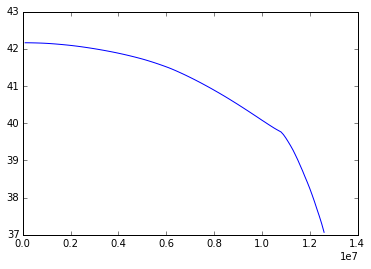

In [103]:
# find correct acceleration at varying depths
dtable = [d for d, g in g_at_depth]
gtable = [g for d, g in g_at_depth]

from bisect import bisect_left

def get_acc_at_depth(depth):
    idx = bisect_left(dtable, depth)
    if idx == len(dtable) - 1:
        return gtable[-1]
    gl, gh = gtable[idx], gtable[idx+1]
    dl, dh = dtable[idx], dtable[idx+1]
    fac = (d - dl)/(dh - dl)
    rg = gl + fac*(gh - gl)
    return rg
    
def get_actual_acc(chlen, R, x):
    depth = math.sqrt(R*R + x*x - chlen*x)
    gd = get_acc_at_depth(depth/1000.0)
    return (gd/(2*depth))*(chlen - 2*x)



results = [(dist1, get_travel_time(dist1, 500, get_actual_acc)) for dist1 in chord_lengths]

# plot of time vs chord length
xvals = [d for d, t in results]
yvals = [t/60.0 for d, t in results]
plt.plot(xvals, yvals)
    

This is so cool... we can travel to the other side of the earth in ~37 minutes, while it takes a longer time to travel to closer places. The kind of result that made this effort worth it.